## Cuarta entrega Visualización

### Carga de DataFrame
**Estadísticas básicas**

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# leo el archivo con encoding latin_1 porque tiene caractéres fuera el utf-8
archivo = pd.read_csv("files/HRDataset_v14.csv", encoding="latin_1") 

# Seteo estilo
mpl.style.use('seaborn')

# explorar DataFrame
# print(archivo.dtypes)
print(archivo.shape)
# print(archivo.columns)
# print(archivo.info)
# archivo.head(6)

# Rennombro la columna porque vino con unos caracteres extraños
archivo = archivo.rename(columns={'ï»¿Employee_Name': 'Employee_Name'})
# archivo["Year"] = archivo["Year"].fillna(0)
# years = archivo["Year"].astype(np.int32)
# archivo.index = years
archivo.describe()


(311, 36)


,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


### Histograma de Salarios

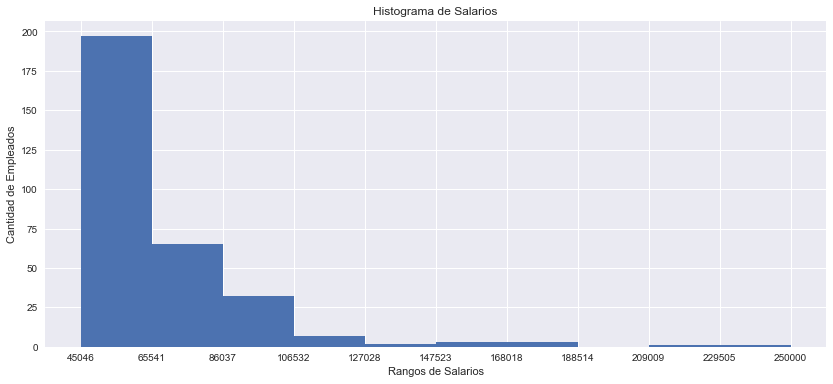

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
n, bins, patches = ax.hist(archivo.Salary, bins=10)
ax.set_ylabel('Cantidad de Empleados')
ax.set_xlabel('Rangos de Salarios')
ax.set_title('Histograma de Salarios')
plt.xticks(bins)
plt.show()

### Gráfico Violin con salarios por género

In [7]:
# Antes voy a crear dos columnas para tener la segmentación con descripciones
def labelGender(row):
    '''Retorma Man cuando el ID es 1 y Woman para el resto'''
    if row['GenderID'] == 1:
        return "Man"
    else:
        return "Woman"

def labelMarried(row):
    '''Retorna Marreid para cuando MarreidID es 1 y Single para el resto'''
    if row['MarriedID'] == 1:
        return "Marreid"
    else:
        return "Single"
#Creo las columnas llamando a la función lambda        
archivo['GenderLabel'] = archivo.apply(lambda row: labelGender(row), axis=1)
archivo['MarriedLabel'] = archivo.apply(lambda row: labelMarried(row), axis=1)


AttributeError: 'FacetGrid' object has no attribute 'set_title'

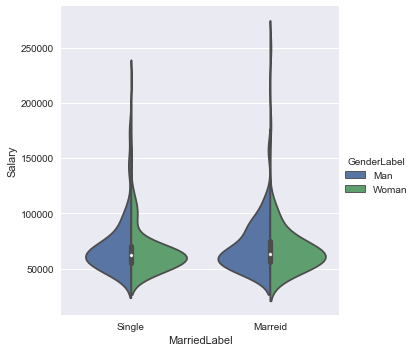

In [9]:
#Ahora si voy a mostrar el gráfico
# Para este tipo de gráfico uso Seaborn
ax = sns.catplot(data=archivo, kind='violin', y="Salary", x="MarriedLabel", hue="GenderLabel", split=True)


### Graficar serie de tiempo por fecha de contratación

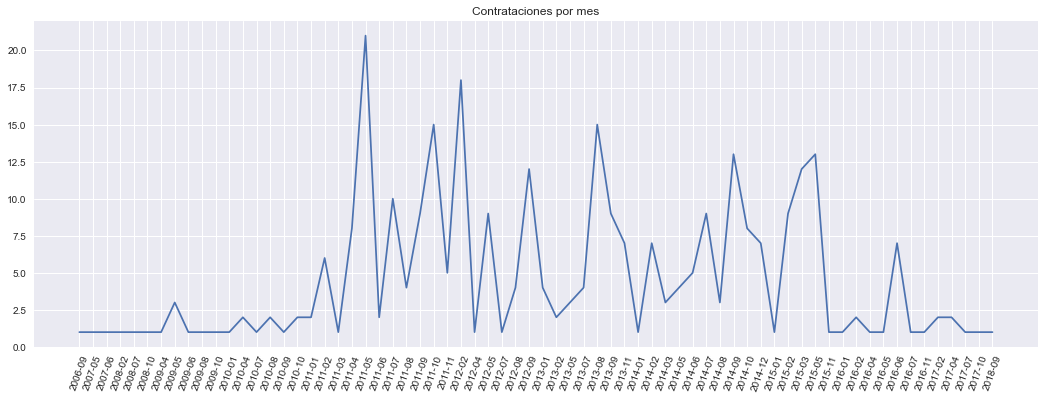

In [12]:

archivo['Fecha'] = pd.to_datetime(archivo['DateofHire'].values, dayfirst=True)
archivo['Fecha'] = archivo['Fecha'].dt.to_period('M')
DFDateofHire = archivo.groupby(archivo['Fecha']).agg('count')

y = DFDateofHire['EmpID']
x = DFDateofHire.index.astype('str')
fig, ax = plt.subplots(figsize=(18, 6))
plt.xticks(rotation=70)
ax.set_title('Contrataciones por mes')
ax.plot(x, y)

